In [1]:
### Run environment setup
import os
import lib.BBSetup as BBSetup

try:
    from google.colab import drive
    BBSetup.colab_setup(mount_folder=r"/content/drive/My Drive/unibo/NLP_project/BarneyBot")
except:
    try:
        BBSetup.anaconda_setup(base_folder=r"C:\Users\User\Documents\Unibo\NLP\BarneyBot",
                            env_name="nlp")
    except:
        print("Impossible to setup anaconda")

### Define folders
base_folder = BBSetup.BASE_FOLDER
print(base_folder)
out_folder = BBSetup.set_folder(os.path.join(base_folder, 'Metrics', 'New'))

Impossible to setup anaconda
C:\Users\User\Documents\Unibo\NLP\BarneyBot\


# Test Frequency Classifier over different number of lines

In [12]:
from functools import partial
from os.path import join, exists
import numpy as np
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from tqdm import tqdm
#
from sklearn.metrics import classification_report as sklcls_report
from sklearn.metrics import f1_score, accuracy_score
from transformers import DataCollatorForLanguageModeling, AutoTokenizer, TFAutoModelForCausalLM
#
from transformers import logging
logging.set_verbosity_info()
# only report errors
logging.set_verbosity(logging.CRITICAL)
#
# Import the metrics library
from lib.BBMetrics import BBMetric
# Pretty print module
import pprint
from lib.BBMetricResults import *
printer = pprint.PrettyPrinter(depth=4, width=300)
# Import project data
from lib.BBData import character_dict, model_name, random_state
from lib.BBDataLoad import dialogpt_preprocess_function, load_char_df, get_chatbot_predictions, merge_df_for_metrics

In [3]:
characters_folder = join(base_folder, "Data", "Characters")
print(characters_folder)
# takes the list of characters
characters = list(character_dict.keys())
# prepares the classification report
classification_report = partial(sklcls_report, target_names=characters)

C:\Users\User\Documents\Unibo\NLP\BarneyBot\Data\Characters


In [4]:

tokenizer = AutoTokenizer.from_pretrained(model_name, cache_dir=join("..", "cache"))
tokenizer.pad_token = '#'
data_collator = DataCollatorForLanguageModeling(mlm=False, tokenizer=tokenizer, return_tensors='tf')
# 
characters_noDefault = characters.copy()
characters_noDefault.remove('Default')

Downloading: 100%|██████████| 26.0/26.0 [00:00<00:00, 10.3kB/s]
c:\Users\User\Documents\Unibo\NLP\BarneyBot\.env\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\Documents\Unibo\NLP\BarneyBot\cache. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Downloading: 100%|██████████| 641/641 [00:00<00:0

In [5]:
# load the frequency chatbot classifier metric
metric = BBMetric.load_metric("frequency chatbot classifier")
print(metric)

{'name': 'frequency chatbot classifier', 'args': {'train': {'required': {'characters_path'}, 'optional': {'mode'}}, 'compute': {'required': {'sentences'}, 'optional': set()}}, 'returns': ['score', 'label'], 'save_actors': ['document'], 'pretty_name': 'Frequency Chatbot Classifier'}


In [6]:
# train the metric
metric.train(characters_path=os.path.join(base_folder, "Data","Characters"))

Loading data


100%|██████████| 9/9 [00:03<00:00,  2.96it/s]


Preprocessing data


100%|██████████| 9/9 [00:08<00:00,  1.05it/s]


Training model
Training done!


In [100]:
### create dataset
n_tests = 20
max_num_lines = 523
sampled_answers_ranges = [mnl for mnl in range(5, max_num_lines, 5)]
doc_test = []
batch_size = 8
override_predictions = False
character = 'Barney'
adversarial = 'Sheldon'
c_id = characters.index(character)
adv_id = characters.index(adversarial)

character_hg = load_char_df(character, base_folder)
adversarial_hg = load_char_df(adversarial, base_folder)
# This transform in a sequence of tokens ours dataset
tokenized_character_hg = character_hg.map(lambda row: dialogpt_preprocess_function(row, tokenizer), batched=False)

# Define tensorflow datasets
encoded_test_set = tokenized_character_hg["test"].to_tf_dataset(
    columns=["input_ids", "attention_mask", "labels"],
    shuffle=False,
    batch_size=batch_size,
    collate_fn=data_collator,
)

chatbot_senteces = []
raw_predictions = []
test_history = {character: [{"n_sentences": ns,
                             "chatbot_senteces": [],
                             "real_senteces": [],
                             "adversarial_sentences":[],
                             "raw_chatbot_predictions": [],
                             "final_chatbot_prediction": [],
                             "raw_real_predictions": [],
                             "final_real_prediction": [],
                             "final_adversarial_prediction": []} for ns in sampled_answers_ranges]}

# test_history[character]

Using custom data configuration default-d78476db32c8db98
Found cached dataset csv (c:/Users/User/Documents/Unibo/NLP/BarneyBot/src/cache/csv/default-d78476db32c8db98/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317)
100%|██████████| 1/1 [00:00<?, ?it/s]
Loading cached split indices for dataset at c:/Users/User/Documents/Unibo/NLP/BarneyBot/src/cache/csv/default-d78476db32c8db98/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-312847c31a279b58.arrow and c:/Users/User/Documents/Unibo/NLP/BarneyBot/src/cache/csv/default-d78476db32c8db98/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-3e6545d8f1f160fe.arrow
Loading cached split indices for dataset at c:/Users/User/Documents/Unibo/NLP/BarneyBot/src/cache/csv/default-d78476db32c8db98/0.0.0/6b34fb8fcf56f7c8ba51dc895bfa2bfbe43546f190a60fcf74bb5e8afdcc2317\cache-9cde59f05c14ff78.arrow and c:/Users/User/Documents/Unibo/NLP/BarneyBot/src/cache/csv/default-d78476db32c8d

In [95]:
# load adversarial predictions
adversarial_sampling = get_chatbot_predictions(
            None, None, character_dict[adversarial]['prediction_filename'] + '_sampling.json',
            "Sampling", adversarial, tokenizer, base_folder, override_predictions=False
        )
adversarial_responses = adversarial_hg['test']['response']
# load real character predictions
predictions_sampling = get_chatbot_predictions(
            None, None, character_dict[character]['prediction_filename'] + '_sampling.json',
            "Sampling", character, tokenizer, base_folder, override_predictions=False
        )
real_responses = character_hg['test']['response']
bot_responses = merge_df_for_metrics(character_hg['test'], None, None, predictions_sampling, tokenizer)['prd_sampling'].tolist()
print(predictions_sampling[:5])
print(real_responses[:5])
print(bot_responses[:5])

Loading predictions from stored file
Loaded predictions from stored file
Loading predictions from stored file
Loaded predictions from stored file


100%|██████████| 522/522 [00:00<00:00, 968.67it/s] 

[[5812, 11, 1793, 11, 345, 821, 8066, 307, 287, 326, 530, 13, 50256], [464, 19145, 1894, 850, 13, 50256], [40, 1444, 1115, 6334, 8213, 284, 1037, 502, 651, 503, 286, 262, 7962, 13, 50256], [2437, 881, 1257, 318, 428, 30, 50256], [2504, 338, 340, 30, 921, 821, 852, 41921, 338, 1266, 1545, 30, 50256]]
["Daddy's home.", "I don't have much time!", "I could tell you knew something was up with me, and you're right. But I can't tell you what it is. I should tell you, but I can't! I have to. I never will! I'm going to. Let's just drop it. What's up with you?", 'A little.', "I'm being Barney, and I think tonight's going to be de... wait for it... lightful. Delightful."]
["Oh, God, you're gonna be in that one.", 'The Meatball sub.', 'I called three emergency personnel to help me get out of the apartment.', 'How much fun is this?', "That's it? You're being Barney's best friend?"]


In [96]:
import random

def shuffle_lists(l1, l2, l3, l4, n):
    zipped = list(zip(l1, l2, l3, l4))
    random.shuffle(zipped)
    l1_shuffled, l2_shuffled, l3_shuffled, l4_shuffled = zip(*zipped)
    return list(l1_shuffled[:n]), list(l2_shuffled[:n]), list(l3_shuffled[:n]), list(l4_shuffled[:n])

In [101]:
for t in tqdm(range(n_tests)):
    for ns, i in zip(sampled_answers_ranges, range(len(sampled_answers_ranges))):
        # Sampling generation method
        pshuffle, rshuffle, bshuffle, ashuffle = shuffle_lists(predictions_sampling, real_responses, bot_responses, adversarial_responses, ns)
        test_history[character][i]["real_senteces"].append(rshuffle)
        test_history[character][i]["adversarial_sentences"].append(ashuffle)
        test_history[character][i]["chatbot_senteces"].append(bshuffle)
        test_history[character][i]["raw_chatbot_predictions"].append(list(metric.compute(sentences=bshuffle)['score']))
        test_history[character][i]["raw_real_predictions"].append(list(metric.compute(sentences=rshuffle)['score']))
        test_history[character][i]["final_chatbot_prediction"].append(list(metric.compute(sentences=bshuffle)['score'])[c_id])
        test_history[character][i]["final_real_prediction"].append(list(metric.compute(sentences=rshuffle)['score'])[c_id])
        test_history[character][i]["final_adversarial_prediction"].append(list(metric.compute(sentences=ashuffle)['score'])[adv_id])

100%|██████████| 20/20 [00:34<00:00,  1.75s/it]


In [102]:
x = [t['n_sentences'] for t in test_history[character]]
y_bot = [np.mean(t['final_chatbot_prediction']) for t in test_history[character]]
std_bot = np.array([np.std(t['final_chatbot_prediction']) for t in test_history[character]])
y_real = [np.mean(t['final_real_prediction']) for t in test_history[character]]
std_real = np.array([np.std(t['final_real_prediction']) for t in test_history[character]])
y_adv = [np.mean(t['final_adversarial_prediction']) for t in test_history[character]]
std_adv = np.array([np.std(t['final_adversarial_prediction']) for t in test_history[character]])

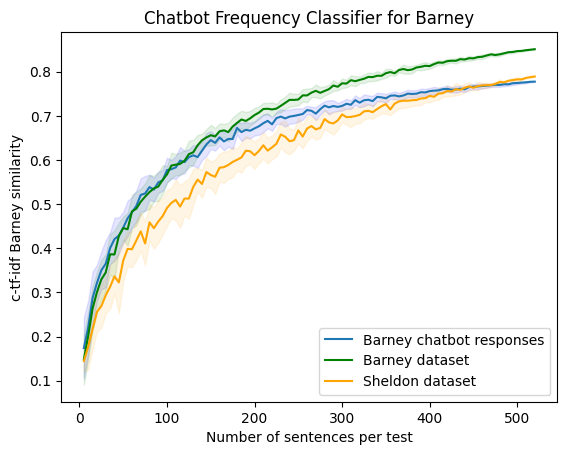

In [110]:
fig, ax = plt.subplots()
ax.set_xlabel('Number of sentences per test')
ax.set_ylabel('c-tf-idf '+character+' similarity')
ax.set_title('Chatbot Frequency Classifier for '+character)

ax.plot(x, y_bot, label=character+' chatbot responses')
# ax.fill_between(x, (y_bot-std_bot), (y_bot+std_bot), color='b', alpha=.1, label='std_bot')
ax.fill_between(x, (y_bot-std_bot), (y_bot+std_bot), color='b', alpha=.1)

ax.plot(x, y_real, label=character+' dataset', color='g')
# ax.fill_between(x, (y_real-std_real), (y_real+std_real), color='green', alpha=.1, label='std_real')
ax.fill_between(x, (y_real-std_real), (y_real+std_real), color='green', alpha=.1)

ax.plot(x, y_adv, label=adversarial+' dataset', color='orange')
# ax.fill_between(x, (y_real-std_real), (y_real+std_real), color='green', alpha=.1, label='std_real')
ax.fill_between(x, (y_adv-std_adv), (y_adv+std_adv), color='orange', alpha=.1)

ax.legend(loc='best')
plt.savefig(join(base_folder, 'src', character+'_cTFIDF.png'))
plt.show()

In [ ]:
# test_run1 = {"Barney": []}
# for t in range(n_tests):
#     for j in range(max_test_size):
#         test_t = test_run[t].copy()
#         chatbot_senteces_t = test_t['chatbot_senteces']
#         raw_predictions_t = test_t['raw_predictions']
#         index = t*n_tests+j
#         test_t['chatbot_senteces'] = chatbot_senteces_t[index]
#         test_t['raw_predictions'] = list(raw_predictions_t[index])
#         test_run1['Barney'].append(test_t) 

In [ ]:
predictions_file = join(base_folder, 'src', 'tmp', character+'_predictions_cTFIDF.json')
with open(predictions_file, 'w', encoding='utf-8') as file:
    json.dump(test_run, file)